In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
x=np.array([95,85,80,70,60])
y=np.array([85,95,70,65,70])
model=np.polyfit(x, y, 1)
model


array([ 0.64383562, 26.78082192])

In [2]:
predict=np.poly1d(model) 
predict(65)

68.63013698630137

In [3]:
y_pred= predict (x)
y_pred

array([87.94520548, 81.50684932, 78.28767123, 71.84931507, 65.4109589 ])

In [4]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.4803218090889326

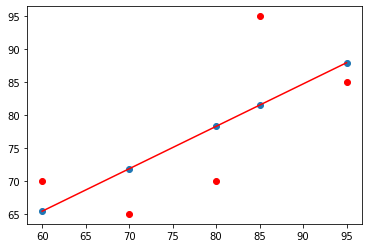

In [5]:
y_line= model[1] + model[0]*x
plt.plot(x, y_line, c='r') 
plt.scatter(x, y_pred)
plt.scatter(x, y, c='r')

In [6]:
from sklearn.datasets import fetch_openml
from sklearn.datasets import fetch_california_housing 
housing = fetch_california_housing()
housing


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [7]:
data = pd.DataFrame(fetch_california_housing().data) 
data.columns =fetch_california_housing().feature_names
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
df=pd.DataFrame(housing.data, columns=housing.feature_names) 
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [9]:
data['PRICE'] = housing.target
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

In [35]:
x = data.drop(['PRICE'], axis = 1)
y = data['PRICE']
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size
=0.2,random_state = 0) 
import sklearn
from sklearn.linear_model import LinearRegression 
lm = LinearRegression()
model=lm.fit(xtrain, ytrain)
ytrain_pred = lm.predict(xtrain)
ytest_pred = lm.predict(xtest)
df=pd.DataFrame(ytrain_pred,ytrain)
df=pd.DataFrame(ytest_pred,ytest)
from sklearn.metrics import mean_squared_error,r2_score 
mse = mean_squared_error(ytest, ytest_pred)
print(mse) 

0.5289841670367199


In [36]:
mse = mean_squared_error(ytrain_pred,ytrain) 
print(mse)

0.5234413607125448


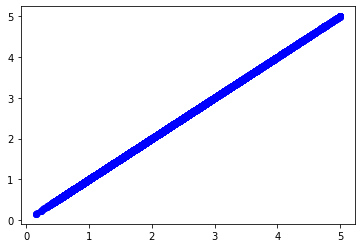

In [37]:
plt.scatter(ytrain ,ytrain,c='blue',marker='o',label='Training data')

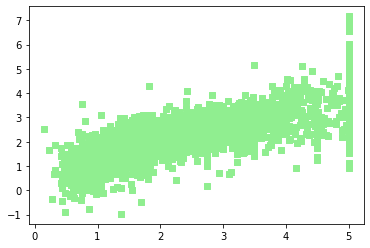

In [25]:
plt.scatter(ytest,ytest_pred ,c='lightgreen',marker='s',label='Test data')

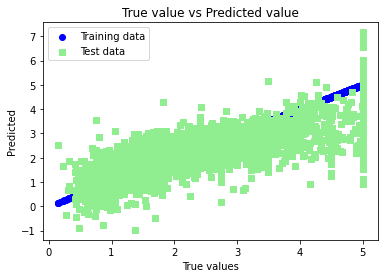

In [28]:
plt.scatter(ytrain ,ytrain,c='blue',marker='o',label='Training data')
plt.scatter(ytest,ytest_pred ,c='lightgreen',marker='s',label='Test data')
plt.xlabel('True values')
plt.ylabel('Predicted')
plt.title("True value vs Predicted value")
plt.legend(loc= 'upper left')
plt.plot()
plt.show()
